In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
import warnings 

Data Reading

In [3]:
data1=pd.read_csv("/content/drive/My Drive/Sentiment Analysis/amazon_cells_labelled.txt",sep='\t',names=["Review","Label"])
data2=pd.read_csv("/content/drive/My Drive/Sentiment Analysis/imdb_labelled.txt",sep='\t',names=["Review","Label"])
data3=pd.read_csv("/content/drive/My Drive/Sentiment Analysis/yelp_labelled.txt",sep='\t',names=["Review","Label"])

In [4]:
frames = [data1, data2, data3]
data = pd.concat(frames)

In [5]:
data.shape

(2748, 2)

In [6]:
data = data.sample(frac = 1)
data.reset_index(inplace=True)
data

,index,Review,Label
0,481,"This place is a jewel in Las Vegas, and exactl...",1
1,295,"You get incredibly fresh fish, prepared with c...",1
2,867,"Nice case, feels good in your hands.",1
3,685,Total brunch fail.,0
4,829,Really good product.,1
...,...,...,...
2743,457,Also great directing and photography.,1
2744,438,Jimmy Stewart is as ever a great hero for Hitc...,1
2745,371,"Okay, I like to consider myself a fair critic,...",1
2746,413,I can assure you that you won't be disappointed.,1


In [7]:
data=data.drop(columns=['index'])

In [8]:
data.head()

,Review,Label
0,"This place is a jewel in Las Vegas, and exactl...",1
1,"You get incredibly fresh fish, prepared with c...",1
2,"Nice case, feels good in your hands.",1
3,Total brunch fail.,0
4,Really good product.,1


Data Cleaning and Preprocessing

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
#Removing special charecters and numbers
data['Review'] = data['Review'].str.replace("[^a-zA-Z#]", " ")

In [12]:
data.head()

,Review,Label
0,This place is a jewel in Las Vegas and exactl...,1
1,You get incredibly fresh fish prepared with c...,1
2,Nice case feels good in your hands,1
3,Total brunch fail,0
4,Really good product,1


In [13]:
#Stemming 

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
stem_data = []
for i in range(0, len(data)):
    review =  data['Review'][i]
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    stem_data.append(review)

In [14]:
#stem_data

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [63]:
#Lemmetization

lemmatize_data=[]
for i in range(len(data)):
    words = data['Review'][i]
    words = words.lower()
    words = words.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    words = ' '.join(words) 
    lemmatize_data.append(words)   

In [22]:
#lemmatize_data

Visualization using WordCloud

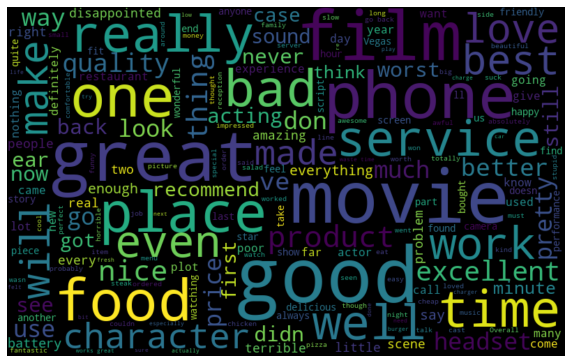

In [49]:
all_words = ' '.join([text for text in data['Review']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

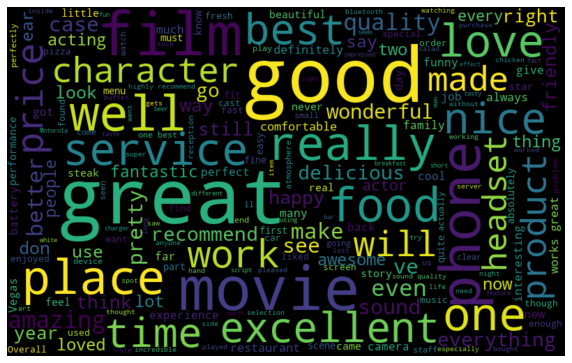

In [54]:
positive_words =' '.join([text for text in data['Review'][data['Label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Bag of Words

In [160]:
#Bag of Words for stem_data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1800)
X = cv.fit_transform(stem_data).toarray()

In [161]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
#Train test Split 
y=data.iloc[:,1].values

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [164]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Model for Sentiment Analysis

In [165]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
sentiment_model = MultinomialNB().fit(X_train, y_train)

In [166]:
y_pred=sentiment_model.predict(X_test)

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
conf_m=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
acc

0.8145454545454546

In [168]:
#Training using Logistic Regression
from sklearn.linear_model import LogisticRegression
sentiment_model2 = LogisticRegression().fit(X_train, y_train)

In [169]:
y_pred2=sentiment_model2.predict(X_test)

In [170]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
conf_m=confusion_matrix(y_test,y_pred2)
acc=accuracy_score(y_test,y_pred2)
conf_m

array([[208,  49],
       [ 53, 240]])

In [171]:
acc

0.8145454545454546

In [40]:
# On Lemmatized Data

In [41]:
#Bag of Words for lemmatize_data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_l = cv.fit_transform(lemmatize_data).toarray()

In [42]:
from sklearn.model_selection import train_test_split
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y, test_size = 0.20, random_state = 0)

In [43]:
# Training model using Naive bayes classifier for Lemmatize_data

from sklearn.naive_bayes import MultinomialNB
sentiment_model_lem = MultinomialNB().fit(X_train_l, y_train_l)
y_pred_l=sentiment_model_lem.predict(X_test_l)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
conf_m=confusion_matrix(y_test_l,y_pred_l)
acc=accuracy_score(y_test_l,y_pred_l)
conf_m


array([[201,  58],
       [ 52, 239]])

In [45]:
acc

0.8

In [46]:
#Training using Logistic Regression for Lemmatize_data
from sklearn.linear_model import LogisticRegression
sentiment_model_lem = LogisticRegression().fit(X_train_l, y_train_l)
y_pred_2=sentiment_model_lem.predict(X_test_l)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
conf_m=confusion_matrix(y_test_l,y_pred_2)
acc=accuracy_score(y_test_l,y_pred_2)
conf_m


array([[216,  43],
       [ 52, 239]])

In [48]:
acc

0.8272727272727273